In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
data['Category'] = data['Category'].map({'ham':0, 'spam':1})
x= data['Message']
y= data['Category']


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
x_vectorizer = vectorizer.fit_transform(x)


In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_vectorizer, y, test_size = 0.2, random_state = 42)

In [8]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train, y_train)

MultinomialNB()

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print('Confution Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9856502242152466
Confution Matrix:
[[957   9]
 [  7 142]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.94      0.95      0.95       149

    accuracy                           0.99      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



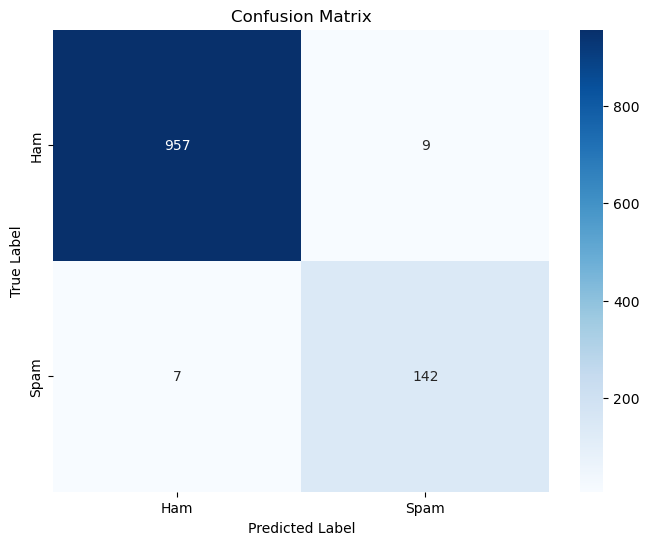

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()